In [29]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import train_test_split
import os
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [11]:
bank = pd.read_csv("C:\Aalesh and Mandar\Datasets\Cases\Bankruptcy\Bankruptcy.csv", index_col = 0)

In [12]:
bank.head()

,D,YR,R1,R2,R3,R4,R5,R6,R7,R8,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
NO,,,,,,,,,,,,,,,,,,,,,
1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,10.36,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,3.13,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,2.41,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,5.55,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,2.85,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06


In [13]:
x = bank.drop(["D","YR"], axis=1)
y=bank["D"]

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify = y, random_state = 2022, train_size = 0.7)

In [15]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
y_pred_prob = rfc.predict_proba(x_test)[:,1]

In [19]:
print(accuracy_score(y_test, y_pred))
print(roc_auc_score(y_test, y_pred_prob))

0.875
0.9225


In [20]:
kfold = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 2022)
params = {"max_features": np.arange(3,15)}
gcv = GridSearchCV(rfc, param_grid = params, verbose = 3, scoring = "roc_auc", cv = kfold)
gcv.fit(x, y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END ....................max_features=3;, score=0.863 total time=   0.3s
[CV 2/5] END ....................max_features=3;, score=0.923 total time=   0.1s
[CV 3/5] END ....................max_features=3;, score=0.837 total time=   0.1s
[CV 4/5] END ....................max_features=3;, score=0.985 total time=   0.1s
[CV 5/5] END ....................max_features=3;, score=0.994 total time=   0.1s
[CV 1/5] END ....................max_features=4;, score=0.865 total time=   0.1s
[CV 2/5] END ....................max_features=4;, score=0.912 total time=   0.1s
[CV 3/5] END ....................max_features=4;, score=0.843 total time=   0.1s
[CV 4/5] END ....................max_features=4;, score=0.979 total time=   0.1s
[CV 5/5] END ....................max_features=4;, score=0.988 total time=   0.1s
[CV 1/5] END ....................max_features=5;, score=0.868 total time=   0.1s
[CV 2/5] END ....................max_features=5;

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=2022, shuffle=True),
             estimator=RandomForestClassifier(),
             param_grid={'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
             scoring='roc_auc', verbose=3)

In [21]:
print(gcv.best_params_)
print(gcv.best_score_)

{'max_features': 8}
0.9213440405748099


In [32]:
best_model = gcv.best_estimator_
best_model

RandomForestClassifier(max_features=8)

In [33]:
imp_features = best_model.feature_importances_
imp_features

array([0.01867422, 0.00809453, 0.01896612, 0.02727958, 0.00923776,
       0.01132896, 0.02030064, 0.04527707, 0.11029783, 0.02955558,
       0.03240554, 0.02178584, 0.01140375, 0.07170918, 0.0555101 ,
       0.01405488, 0.07836169, 0.06424565, 0.02915731, 0.0224487 ,
       0.1035926 , 0.0189996 , 0.03467901, 0.14263388])

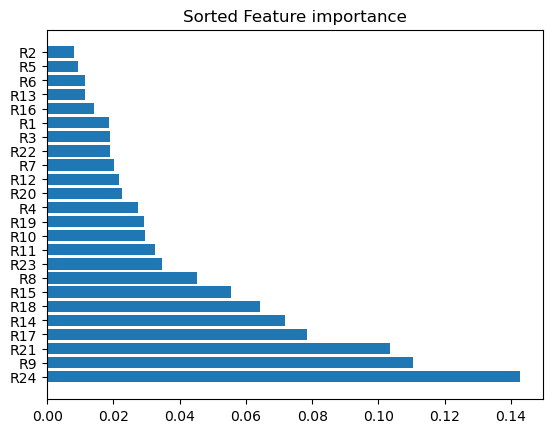

In [41]:
i_sorted = np.argsort(-imps)
n_sorted = x.columns[i_sorted]
imp_sort = imps[i_sorted]
plt.barh(n_sorted, imp_sort)
plt.title("Sorted Feature importance")
plt.show()